In [75]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

In [76]:
# arguments
cam_H, cam_W = 580, 890
wvls = np.arange(420, 670, 10)
patch_size = 25
n_illum = 128
n_patches = 4
n_channel = 3
patch_name = ["red", "green", "blue", "white"]

## Get R,G,B,W patches information

Text(0.5, 0, 'wavelength [nm]')

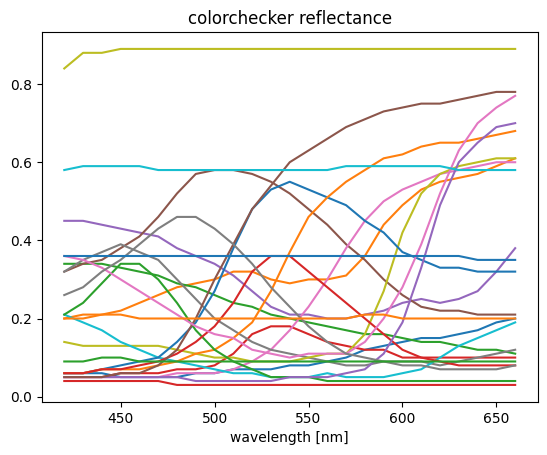

In [77]:
# Replace 'file.csv' with the path to your CSV file
file_path = './dataset/MacbethColorChecker.csv'
# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path, header=None, skiprows=2)

# Display the DataFrame
wvls_CC = df.values[1:,0]
wvls_CC = [float(x) for x in wvls_CC] 
ref_CC = df.values[1:,1:-2]

ind_min = 6
ind_max = 61
wvls_CC = wvls_CC[ind_min:ind_max:2] 
ref_CC = ref_CC[ind_min:ind_max:2,:]

# print(wvls_CC, ref_CC)

plt.figure()
plt.plot(wvls_CC[1:-2], ref_CC[1:-2])
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

In [78]:
ref_CC[:, 0] # 1번째 idx 는 wvl 에 대한 정보 / 두번째 idx는 patch 1부터 24까지

array([0.07, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.07,
       0.07, 0.07, 0.08, 0.08, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.15,
       0.16, 0.17, 0.19, 0.2, 0.22, 0.24], dtype=object)

In [79]:
blue = ref_CC[1:-2,12] # 87, 370
green = ref_CC[1:-2,13] # 218, 370
red = ref_CC[1:-2,14] # 349, 376
white = ref_CC[1:-2,18] # 74, 500

In [80]:
center_pts = np.array([[349, 376],[218, 370], [87, 370],[74, 500]]) # R, G, B, W

In [81]:
color_check_hyp_gt = np.zeros(shape=(cam_H, cam_W, len(wvls)))

In [82]:
color_check_hyp_gt[center_pts[0,1]-patch_size:center_pts[0,1]+patch_size, center_pts[0,0]-patch_size:center_pts[0,0]+patch_size] = red
color_check_hyp_gt[center_pts[1,1]-patch_size:center_pts[1,1]+patch_size, center_pts[1,0]-patch_size:center_pts[1,0]+patch_size] = green
color_check_hyp_gt[center_pts[2,1]-patch_size:center_pts[2,1]+patch_size, center_pts[2,0]-patch_size:center_pts[2,0]+patch_size] = blue
color_check_hyp_gt[center_pts[3,1]-patch_size:center_pts[3,1]+patch_size, center_pts[3,0]-patch_size:center_pts[3,0]+patch_size] = white

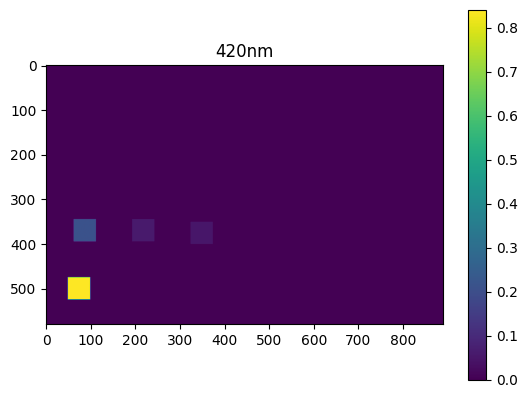

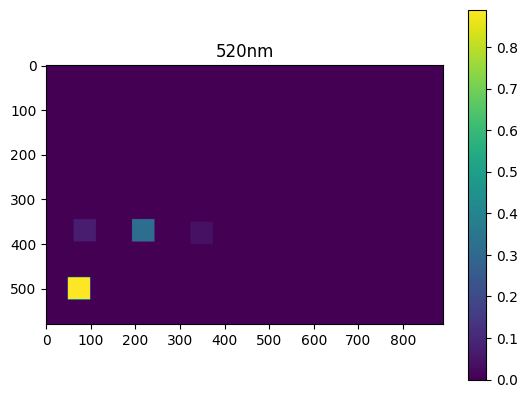

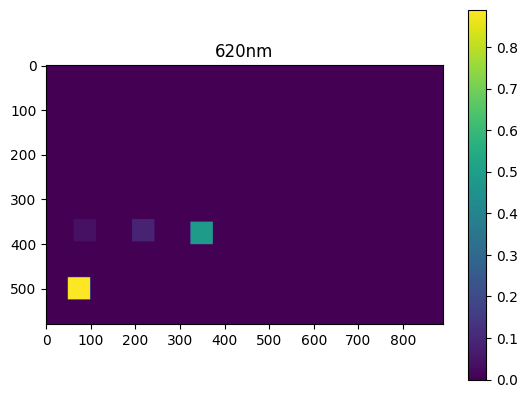

In [83]:
for i in range(0,25,10):
    plt.imshow(color_check_hyp_gt[:,:,i]), plt.colorbar(), plt.title("%snm"%wvls[i])
    plt.show()

In [84]:
# np.save('color_check_hyp_gt.npy', color_check_hyp_gt)

## Plotting Graph

### RGB intensity

In [127]:
N3_arr_real_hdr = np.load('./hdr_step3.npy') / 65535.
N3_arr_real_hdr = N3_arr_real_hdr[:,:,:,::-1]
# N3_arr_real = np.load('./N3_arr_real.npy')
N3_arr_simulation = np.load('./N3_arr_simulation.npy')

In [131]:
# N3_arr_real = N3_arr_real.reshape(cam_H, cam_W, n_illum, 3)
N3_arr_real = N3_arr_real_hdr.reshape(cam_H, cam_W, n_illum, 3)
N3_arr_simulation = N3_arr_simulation.reshape(cam_H, cam_W, n_illum, 3)

##### Patch Test

In [184]:
# green cneter point에 초록색 파장의 first order가 닿았을 때 : 93 patt
# green cneter point에 초록색 파장의 first order가 닿았을 때 : 103 patt


p = 1 # G
print('simulation : ', N3_arr_simulation[center_pts[p][1], center_pts[p][0], 93])# 57에서 Red white pattern light

print('real : ', N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 93]) # 57에서 Red white pattern light

simulation :  [0.00351477 0.01768458 0.00531272]
real :  [0.0873987  0.10307413 0.08828523]


In [183]:
# green cneter point에 아무것도 안닿았을 때 : 23 patt

p = 1 # G
print('simulation : ', N3_arr_simulation[center_pts[p][1], center_pts[p][0], 23])# 57에서 Red white pattern light

print('real : ', N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 23]) # 57에서 Red white pattern light

simulation :  [0. 0. 0.]
real :  [0.08722449 0.09296263 0.08627971]


In [188]:
# blue cneter point에 파란색 파장의 first order가 닿았을 때 : 71 patt
# blue cneter point에 안 닿았을 때 : 60 patt


p = 2 # G
print('simulation : ', N3_arr_simulation[center_pts[p][1], center_pts[p][0], 71])# 57에서 Red white pattern light

print('real : ', N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 71]) # 57에서 Red white pattern light

simulation :  [0.00946218 0.0095376  0.02867342]
real :  [0.08768188 0.08838805 0.10066965]


In [187]:
# blue cneter point에 아무것도 안닿았을 때 : 60 patt

p = 2 # G
print('simulation : ', N3_arr_simulation[center_pts[p][1], center_pts[p][0], 60])# 57에서 Red white pattern light

print('real : ', N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 60]) # 57에서 Red white pattern light

simulation :  [0. 0. 0.]
real :  [0.08699783 0.08691833 0.08943784]


In [165]:
p = 1 # G
N3_arr_real[center_pts[p][1], center_pts[p][0], 93] # 57에서 Red white pattern light

array([0.0873987 , 0.10307413, 0.08828523])

In [177]:
p = 2 # B 
print(N3_arr_real[center_pts[p][1], center_pts[p][0], 28]) # 57에서 Red white pattern light
print(N3_arr_simulation[center_pts[p][1], center_pts[p][0], 28]) # 57에서 Red white pattern light

[0.12768147 0.19387401 0.32125975]
[0.09184393 0.13729544 0.1979553 ]


In [181]:
p = 0 # R
print(N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 57]) # 57에서 Red white pattern light
print(N3_arr_simulation[center_pts[p][1], center_pts[p][0], 57]) 

[0.45835992 0.23114916 0.12895855]
[0.2647642  0.13391808 0.07513762]


In [185]:
p = 3 # W
print(N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 27]) # 57에서 Red white pattern light
print(N3_arr_simulation[center_pts[p][1], center_pts[p][0], 27])

[0.96070922 1.34241653 0.96059491]
[0.8741848 1.        0.7442386]


In [186]:
p = 1 # G
print(N3_arr_real_hdr[center_pts[p][1], center_pts[p][0], 42]) # 57에서 Red white pattern light
print(N3_arr_simulation[center_pts[p][1], center_pts[p][0], 42]) # 57에서 Red white pattern light

[0.20327564 0.52206019 0.22177975]
[0.13630202 0.3068898  0.13045675]


#### Plotting

In [132]:
# plot reflectance for each patches
# patches : 24개, wvl : 25 개

patches_rgb_real = np.zeros(shape = (n_illum, n_channel, n_patches))
patches_idx = center_pts

for l in range(n_illum):
    for p in range(n_patches):
        for c in range(n_channel):
            x_idx, y_idx = patches_idx[p][0], patches_idx[p][1]
            rgb_intensity = N3_arr_real[y_idx, x_idx, l, c]
            # print('illum num %s, patch num %s, channel num %s' %(l, p, c),rgb_intensity)
            patches_rgb_real[l, c, p] = rgb_intensity

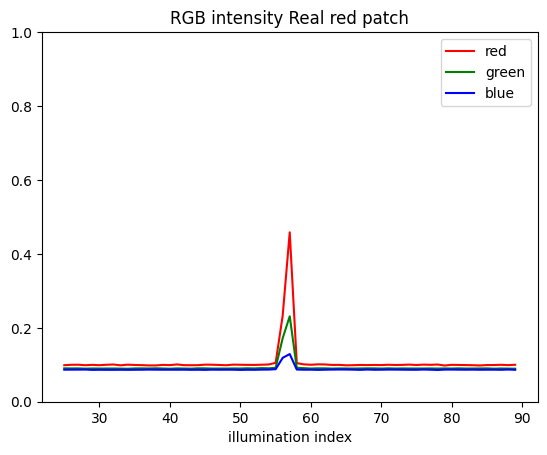

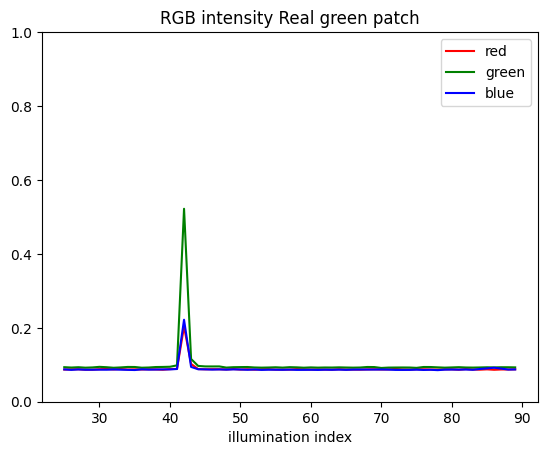

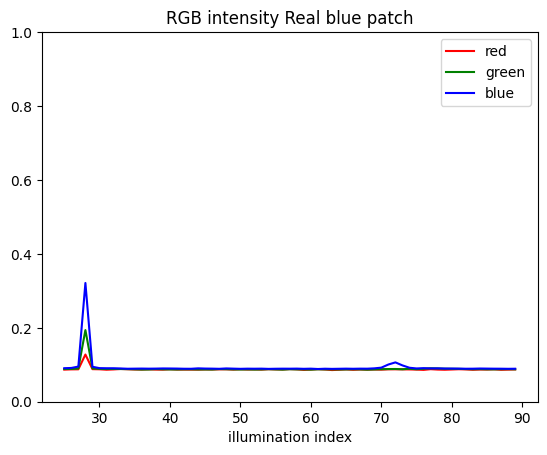

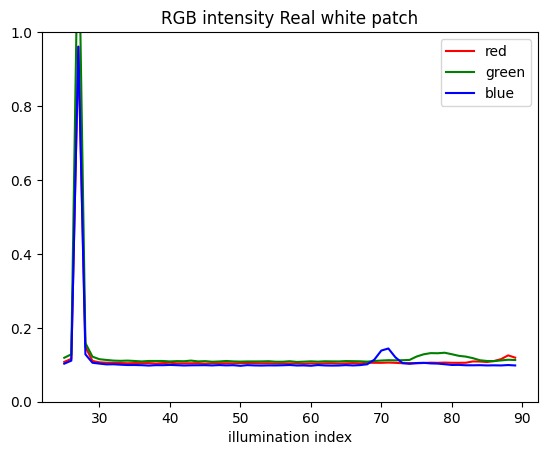

In [193]:
illum = np.arange(0, n_illum, 1)

start_idx = 25
end_idx = 90

for p in range(n_patches):
    plt.figure()

    plt.plot(illum[start_idx:end_idx], patches_rgb_real[start_idx:end_idx, 0, p], label = 'red', c = 'red')
    plt.plot(illum[start_idx:end_idx], patches_rgb_real[start_idx:end_idx, 1, p], label = 'green', c = 'green')
    plt.plot(illum[start_idx:end_idx], patches_rgb_real[start_idx:end_idx, 2, p], label = 'blue', c = 'blue')

    # plt.plot(illum[start_idx: end_idx], patches_rgb_real[start_idx: end_idx, 0, p], label = 'red', c = 'red')
    # plt.plot(illum[start_idx: end_idx], patches_rgb_real[start_idx: end_idx, 1, p], label = 'green', c = 'green')
    # plt.plot(illum[start_idx: end_idx], patches_rgb_real[start_idx: end_idx, 2, p], label = 'blue', c = 'blue')   
    
    plt.ylim(0,1)
    plt.legend()
    plt.title('RGB intensity Real %s patch'%patch_name[p])
    plt.xlabel('illumination index')

#### Simulation

In [134]:
N3_arr_simulation.min()

0.0

In [191]:
# plot reflectance for each patches
# patches : 24개, wvl : 25 개

patches_rgb = np.zeros(shape = (n_illum, n_channel, n_patches))
patches_idx = center_pts

for l in range(n_illum):
    for p in range(n_patches):
        for c in range(n_channel):
            x_idx, y_idx = patches_idx[p][0], patches_idx[p][1]
            rgb_intensity = N3_arr_simulation[y_idx, x_idx, l, c]
            patches_rgb[l, c, p] = rgb_intensity

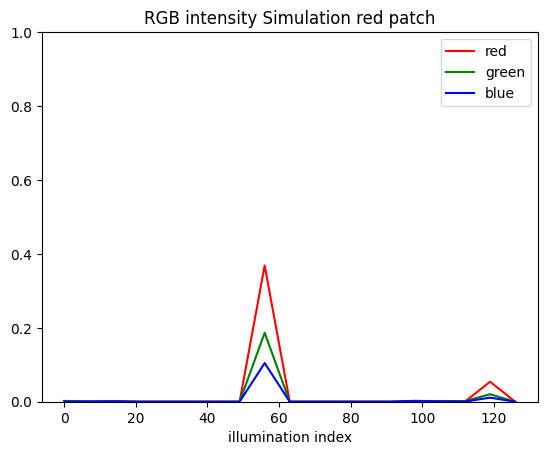

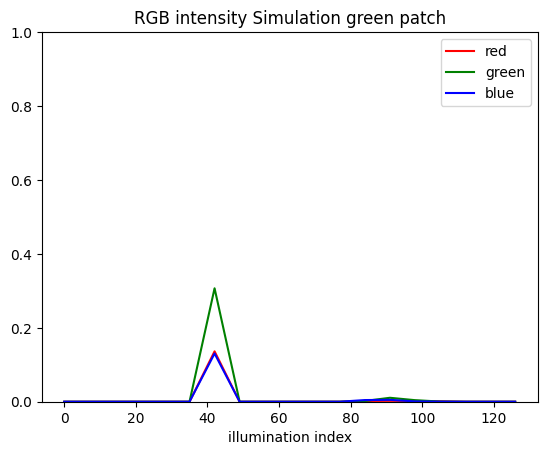

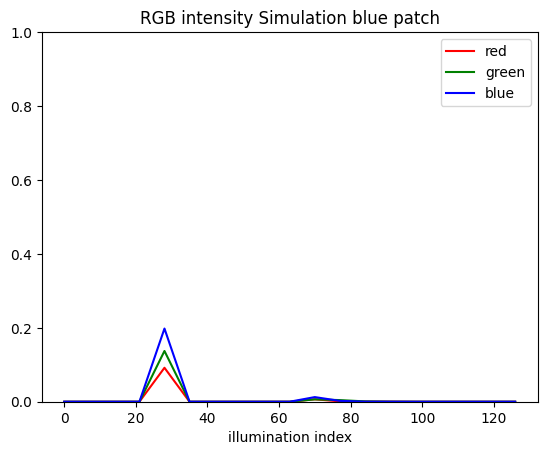

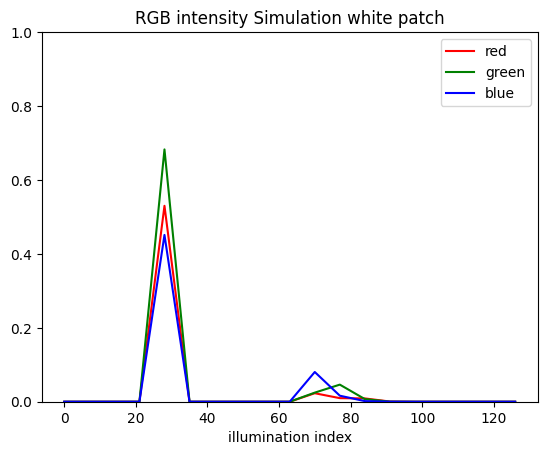

In [192]:
illum = np.arange(0, n_illum, 1)

for p in range(n_patches):
    plt.figure()

    plt.plot(illum[start_idx: end_idx], patches_rgb[start_idx: end_idx, 0, p], label = 'red', c = 'red')
    plt.plot(illum[start_idx: end_idx], patches_rgb[start_idx: end_idx, 1, p], label = 'green', c = 'green')
    plt.plot(illum[start_idx: end_idx], patches_rgb[start_idx: end_idx, 2, p], label = 'blue', c = 'blue')

    # plt.plot(illum[::7], patches_rgb[::7, 0, p], label = 'red', c = 'red')
    # plt.plot(illum[::7], patches_rgb[::7, 1, p], label = 'green', c = 'green')
    # plt.plot(illum[::7], patches_rgb[::7, 2, p], label = 'blue', c = 'blue')

    plt.ylim(0,1)
    plt.legend()
    plt.title('RGB intensity Simulation %s patch'%patch_name[p])
    plt.xlabel('illumination index')

### Hyperspectral reconstruction

#### Real

In [148]:
# X_np_all_real = np.load('./X_np_all_real.npy').reshape(cam_H, cam_W, len(wvls))
X_np_all_real = np.load('./X_np_all_step_tv.npy').reshape(cam_H, cam_W, len(wvls))
X_np_all = np.load('./X_np_all_simulation_low_intensity.npy').reshape(cam_H, cam_W, len(wvls)) * 4

In [149]:
X_np_all.shape

(580, 890, 25)

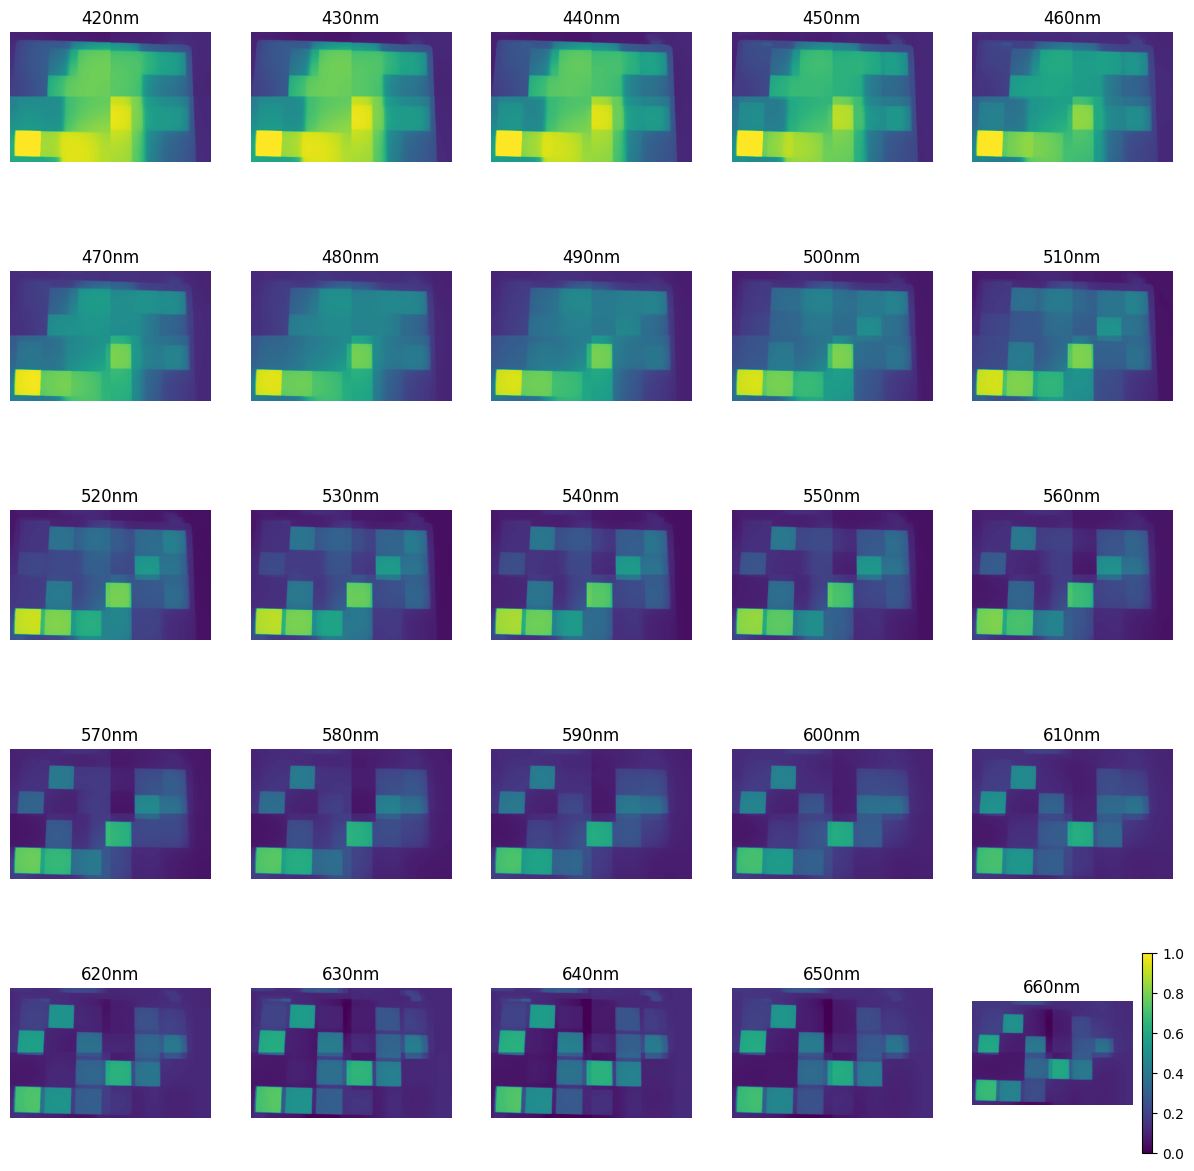

In [150]:
max_images_per_column = 5
num_columns = (len(wvls) + max_images_per_column - 1) // max_images_per_column
plt.figure(figsize=(15, 3*num_columns))

for c in range(num_columns):
    start_index = c * max_images_per_column
    end_index = min(start_index + max_images_per_column, len(wvls))
    num_images = end_index - start_index
    
    for i in range(num_images):
        plt.subplot(num_columns, num_images, i + c * num_images + 1)
        plt.imshow(X_np_all_real[:, :, i + start_index], vmin=0, vmax=1)
        plt.axis('off')
        # plt.title(f"Image {i + start_index}")
        plt.title("%snm"%wvls[i+start_index])
        if i + start_index == len(wvls) - 1:
            plt.colorbar()

In [151]:
# plot reflectance for each patches
# patches : 24개, wvl : 25 개

patches_reflectance_real = np.zeros(shape = (len(wvls), n_patches))
patches_idx = center_pts

for p in range(n_patches):
    for w in range(len(wvls)):
        x_idx, y_idx = patches_idx[p][0], patches_idx[p][1]
        mean_ref = X_np_all_real[y_idx-patch_size:y_idx+patch_size,x_idx-patch_size:x_idx+patch_size, w].mean()
        patches_reflectance_real[w, p] = mean_ref

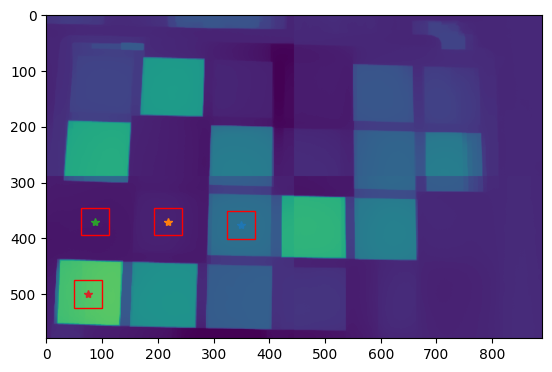

In [152]:
img = X_np_all_real[...,21]

fig, ax = plt.subplots()
for p in range(n_patches):
    plt.plot(patches_idx[p][0],patches_idx[p][1], "*")
    ax.add_patch(patches.Rectangle([patches_idx[p][0]-patch_size,patches_idx[p][1]-patch_size], patch_size*2, patch_size*2, fill = False, edgecolor = 'red'))
    plt.imshow(img, vmin = 0., vmax = 1.)

In [153]:
patches_ref_clip_real = np.clip(patches_reflectance_real, 0 ,1)

#### Simulation

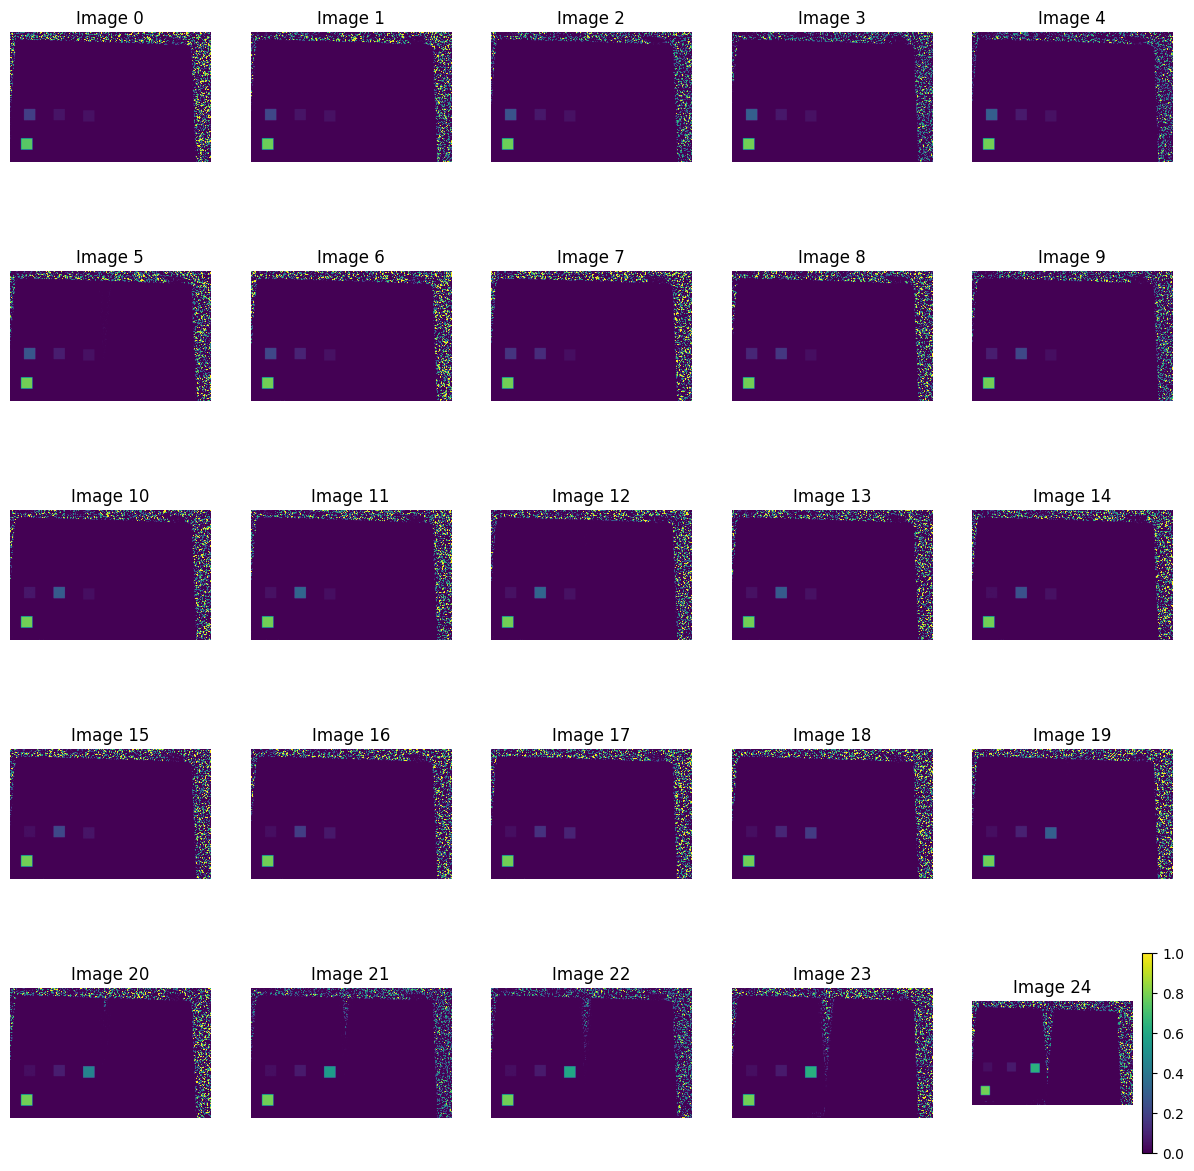

In [154]:
max_images_per_column = 5
num_columns = (len(wvls) + max_images_per_column - 1) // max_images_per_column
plt.figure(figsize=(15, 3*num_columns))

for c in range(num_columns):
    start_index = c * max_images_per_column
    end_index = min(start_index + max_images_per_column, len(wvls))
    num_images = end_index - start_index
    
    for i in range(num_images):
        plt.subplot(num_columns, num_images, i + c * num_images + 1)
        plt.imshow(X_np_all[:, :, i + start_index], vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f"Image {i + start_index}")
        
        if i + start_index == len(wvls) - 1:
            plt.colorbar()

In [155]:
# plot reflectance for each patches
# patches : 24개, wvl : 25 개

patches_reflectance = np.zeros(shape = (len(wvls), n_patches))
patches_idx = center_pts

for p in range(n_patches):
    for w in range(len(wvls)):
        x_idx, y_idx = patches_idx[p][0], patches_idx[p][1]
        mean_ref = X_np_all[y_idx-patch_size:y_idx+patch_size,x_idx-patch_size:x_idx+patch_size, w].mean()
        patches_reflectance[w, p] = mean_ref

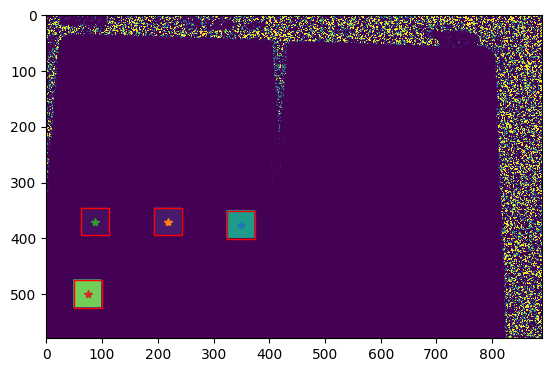

In [156]:
img = X_np_all[...,21]

fig, ax = plt.subplots()
for p in range(n_patches):
    plt.plot(patches_idx[p][0],patches_idx[p][1], "*")
    ax.add_patch(patches.Rectangle([patches_idx[p][0]-patch_size,patches_idx[p][1]-patch_size], patch_size*2, patch_size*2, fill = False, edgecolor = 'red'))
    plt.imshow(img, vmin = 0., vmax = 1.)

In [157]:
patches_ref_clip = np.clip(patches_reflectance, 0 ,1)

In [158]:
patches_ref_clip.shape

(25, 4)

### Reflectance Comparison

Text(0.5, 0, 'wavelength [nm]')

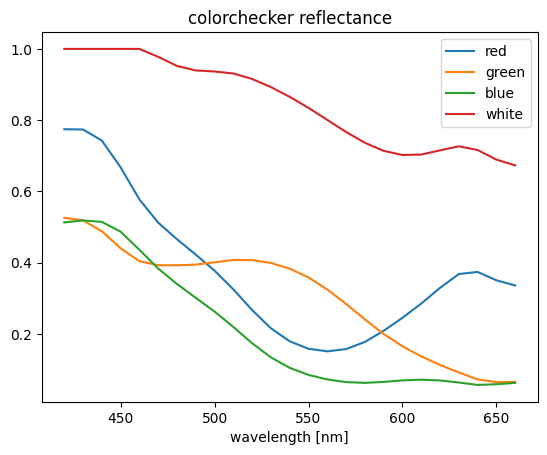

In [189]:
plt.figure()

plt.plot(wvls, patches_ref_clip_real[:,0], label = 'red')
plt.plot(wvls, patches_ref_clip_real[:,1], label = 'green')
plt.plot(wvls, patches_ref_clip_real[:,2], label = 'blue')
plt.plot(wvls, patches_ref_clip_real[:,3], label = 'white')

plt.legend()
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

Text(0.5, 0, 'wavelength [nm]')

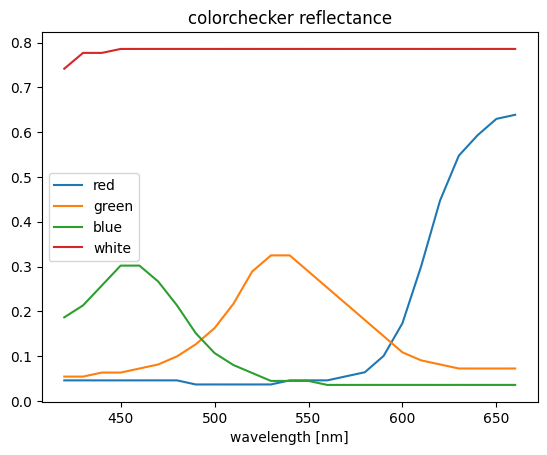

In [160]:
plt.figure()
plt.plot(wvls, patches_ref_clip[:,0], label = 'red')
plt.plot(wvls, patches_ref_clip[:,1], label = 'green')
plt.plot(wvls, patches_ref_clip[:,2], label = 'blue')
plt.plot(wvls, patches_ref_clip[:,3], label = 'white')

plt.legend()
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

In [161]:
patches_ref_clip.shape

(25, 4)

Text(0.5, 0, 'wavelength [nm]')

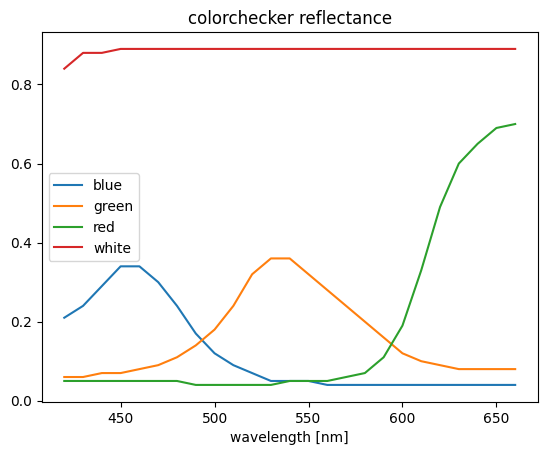

In [162]:
plt.figure()
plt.plot(wvls_CC[1:-2], ref_CC[1:-2,12], label = 'blue')
plt.plot(wvls_CC[1:-2], ref_CC[1:-2,13], label = 'green')
plt.plot(wvls_CC[1:-2], ref_CC[1:-2,14], label = 'red')
plt.plot(wvls_CC[1:-2], ref_CC[1:-2,18], label = 'white')

plt.legend()
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')